# Forest Fire Analysis

### play around with data 

In [7]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from pprint import pprint
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
import seaborn as sns

In [26]:
# Import data from csv

fire_df = pd.read_csv("Resources/forestfires.csv")

fire_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [27]:
# Encode categorical variables (month and day) 
fire_df = pd.get_dummies(fire_df, columns=["month", "day"])

# Calculate the correlation matrix 
correlation_matrix = fire_df.corr()

# Exclude the correlation of area with itself
area_correlations = correlation_matrix["area"].drop("area").sort_values(ascending=False)


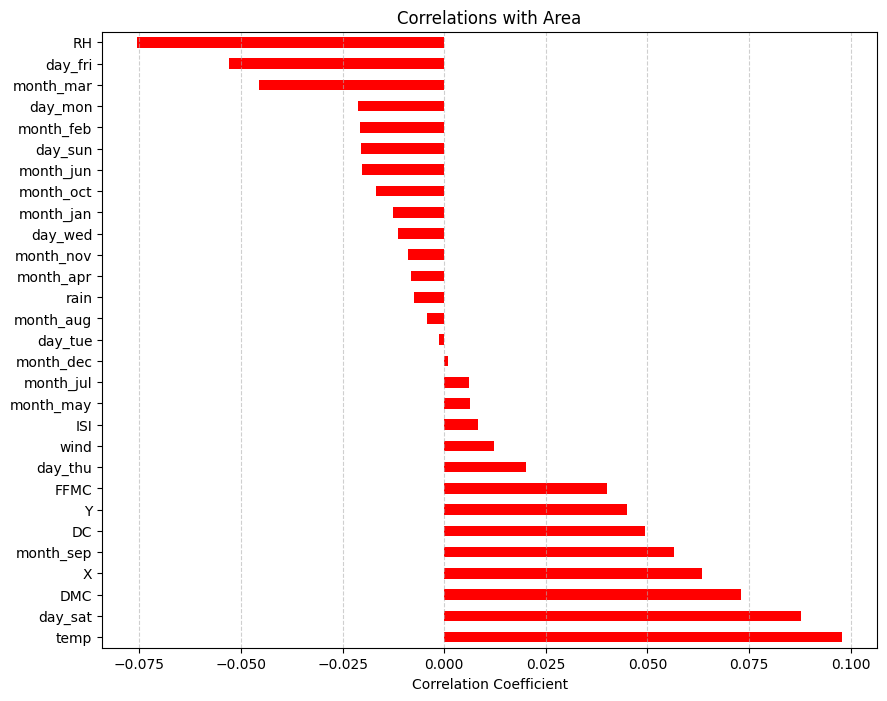

In [33]:
#Visualize Correlation Matrix
plt.figure(figsize=(10, 8))
area_correlations.plot(kind="barh", color="red")
plt.xlabel("Correlation Coefficient")
plt.title("Correlations with Area")
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

In [29]:
#Add Fire Occured Collumn 
fire_df['fire_occurred'] = (fire_df['area'] > 0).astype(int)

fire_df.head()




,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,fire_occurred
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,True,False,False,False,False,False,False,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,True,False,False,False,False,False,False,True,False,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,True,False,False,False,True,False,False,False,False,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,False,False,True,False,False,False,False,False,False,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,False,False,False,False,False,True,False,False,False,0


In [32]:
# Drop the area column
fire_df_no_area = fire_df.drop(columns=["area"])

# Calculate the correlation matrix
correlation_matrix = fire_df_no_area.corr(method='spearman')

# Set diagonal elements to NaN to exclude self-correlations
np.fill_diagonal(correlation_matrix.values, np.nan)

# Find the correlations with the "fire_occurred" column
fire_occurred_correlations = correlation_matrix["fire_occurred"].sort_values(ascending=False)

print(fire_occurred_correlations)


month_dec        0.127308
temp             0.107407
DMC              0.078801
DC               0.066645
X                0.061355
month_sep        0.058959
Y                0.048640
ISI              0.048387
day_wed          0.048098
FFMC             0.045667
wind             0.033266
day_tue          0.030292
month_aug        0.023512
month_jul        0.020701
day_mon          0.003914
month_may       -0.002775
month_feb       -0.008933
day_thu         -0.010286
RH              -0.010305
day_fri         -0.014529
month_jun       -0.019068
day_sat         -0.019614
month_apr       -0.020731
day_sun         -0.026128
month_nov       -0.046027
month_jan       -0.065155
month_oct       -0.065375
rain            -0.067598
month_mar       -0.116497
fire_occurred         NaN
Name: fire_occurred, dtype: float64


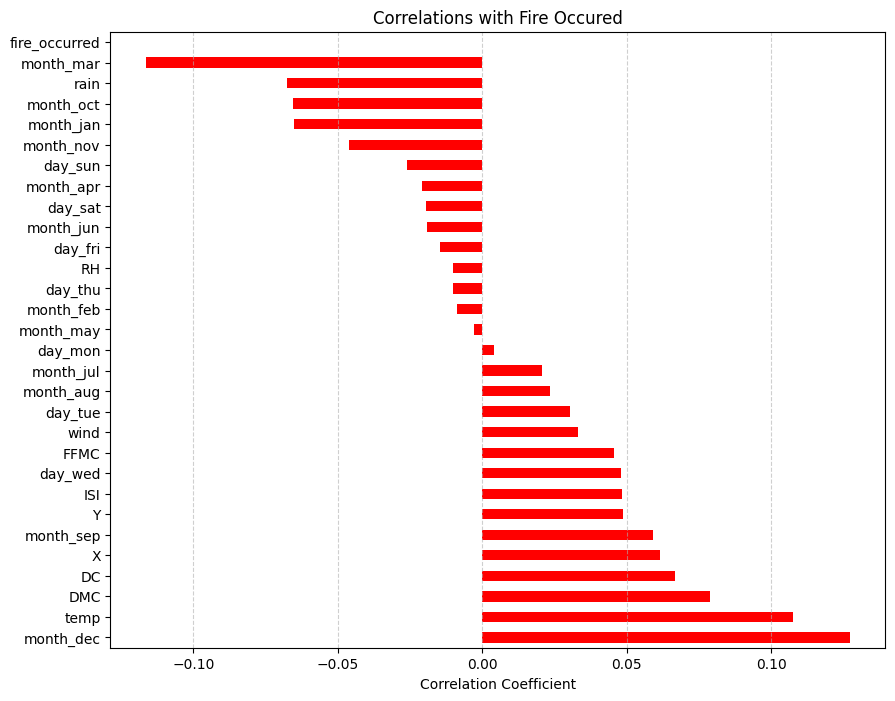

In [34]:
#Visualize Correlation Matrix
plt.figure(figsize=(10, 8))
fire_occurred_correlations.plot(kind="barh", color="red")
plt.xlabel("Correlation Coefficient")
plt.title("Correlations with Fire Occured")
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

In [9]:
fire_df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [10]:
fire_df.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

In [11]:
# drop NA
fire_df = fire_df.dropna(how='any')
fire_df.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

In [12]:
spacial_group = fire_df.groupby(["X", "Y"])
spacial_group.count()

month  day  FFMC  DMC  DC  ISI  temp  RH  wind  rain  area
X Y                                                            
1 2     19   19    19   19  19   19    19  19    19    19    19
  3     10   10    10   10  10   10    10  10    10    10    10
  4     15   15    15   15  15   15    15  15    15    15    15
  5      4    4     4    4   4    4     4   4     4     4     4
2 2     25   25    25   25  25   25    25  25    25    25    25
  3      1    1     1    1   1    1     1   1     1     1     1
  4     27   27    27   27  27   27    27  27    27    27    27
  5     20   20    20   20  20   20    20  20    20    20    20
3 3      1    1     1    1   1    1     1   1     1     1     1
  4     43   43    43   43  43   43    43  43    43    43    43
  5      7    7     7    7   7    7     7   7     7     7     7
  6      4    4     4    4   4    4     4   4     4     4     4
4 3     22   22    22   22  22   22    22  22    22    22    22
  4     36   36    36   36  36   36    36  36    36    36    36
  5     25   25    25   25  25   25    25  25    25    25    25
  6      8    8     8    8   8    8     8   8     8     8     8
5 4     23   23    23   23  23   23    23  23    23    23    23
  5      3    3     3    3   3    3     3   3     3     3     3
  6      4    4     4    4   4    4     4   4     4     4     4
6 3     25   25    25   25  25   25    25  25    25    25    25
  4      9    9     9    9   9    9     9   9     9     9     9
  5     49   49    49   49  49   49    49  49    49    49    49
  6      3    3     3    3   3    3     3   3     3     3     3
7 3      2    2     2    2   2    2     2   2     2     2     2
  4     45   45    45   45  45   45    45  45    45    45    45
  5     11   11    11   11  11   11    11  11    11    11    11
  6      2    2     2    2   2    2     2   2     2     2     2
8 3      3    3     3    3   3    3     3   3     3     3     3
  4      1    1     1    1   1    1     1   1     1     1     1
  5      4    4     4    4   4    4     4   4     4     4     4
  6     52   52    52   52  52   52    52  52    52    52    52
  8      1    1     1    1   1    1     1   1     1     1     1
9 4      4    4     4    4   4    4     4   4     4     4     4
  5      2    2     2    2   2    2     2   2     2     2     2
  6      1    1     1    1   1    1     1   1     1     1     1
  9      6    6     6    6   6    6     6   6     6     6     6

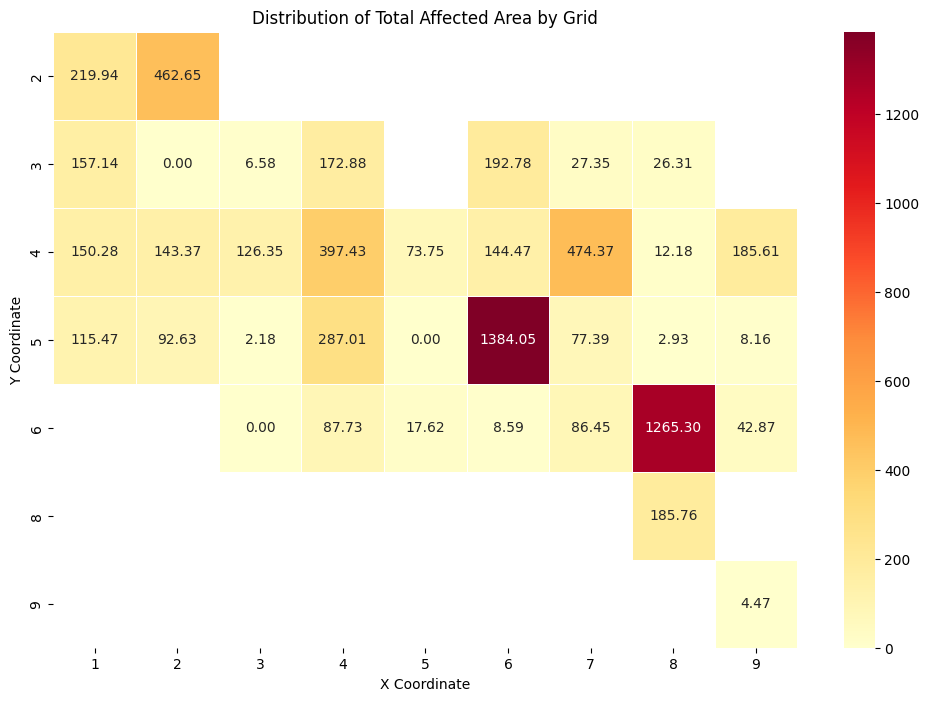

In [15]:
# Group the data by X and Y coordinates and sum the affected area in each grid
spatial_group = fire_df.groupby(["X", "Y"])["area"].sum().reset_index(name="Total Affected Area")

# Pivot the data to create a grid
heatmap_data = spatial_group.pivot_table(index="Y", columns="X", values="Total Affected Area", aggfunc="sum")

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Distribution of Total Affected Area by Grid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()


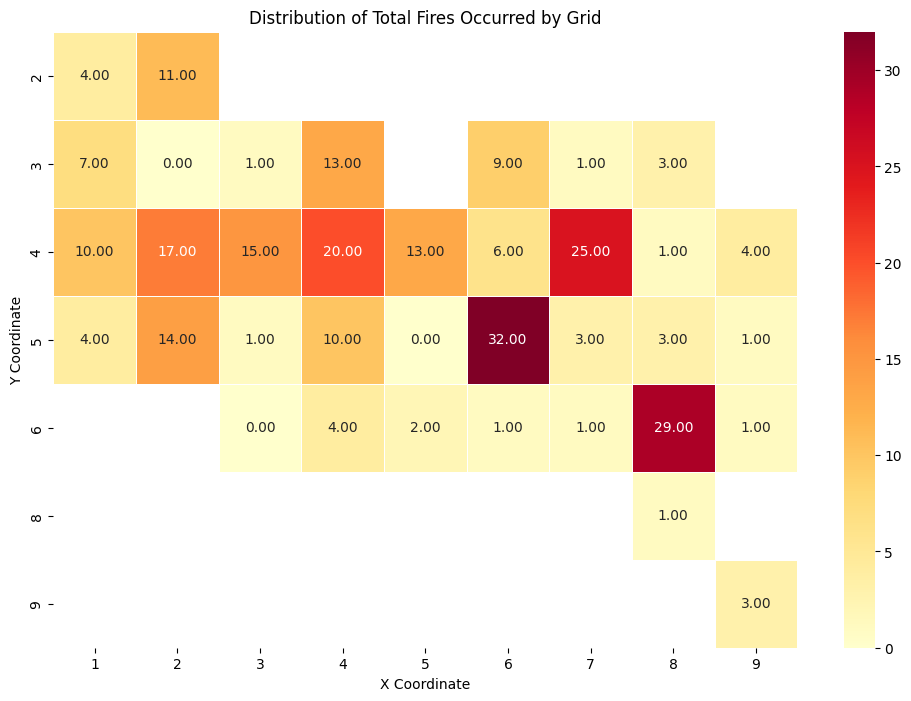

In [35]:
# Group the data by X and Y coordinates and sum the fires that occurred in each grid
spatial_group = fire_df.groupby(["X", "Y"])["fire_occurred"].sum().reset_index(name="Total Fires Occurred")

# Pivot the data to create a grid
heatmap_data = spatial_group.pivot_table(index="Y", columns="X", values="Total Fires Occurred", aggfunc="sum")

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Distribution of Total Fires Occurred by Grid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()


In [ ]:
spacial_group["area"].sum()

X  Y
1  2     219.94
   3     157.14
   4     150.28
   5     115.47
2  2     462.65
   3       0.00
   4     143.37
   5      92.63
3  3       6.58
   4     126.35
   5       2.18
   6       0.00
4  3     172.88
   4     397.43
   5     287.01
   6      87.73
5  4      73.75
   5       0.00
   6      17.62
6  3     192.78
   4     144.47
   5    1384.05
   6       8.59
7  3      27.35
   4     474.37
   5      77.39
   6      86.45
8  3      26.31
   4      12.18
   5       2.93
   6    1265.30
   8     185.76
9  4     185.61
   5       8.16
   6      42.87
   9       4.47
Name: area, dtype: float64

In [ ]:
spacial_group.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,5,5,aug,sun,94.0,47.9,100.7,10.7,17.3,80,4.5,0.0,0.00
472,8,3,jun,mon,88.2,96.2,229.0,4.7,14.3,79,4.0,0.0,1.94
473,9,4,jun,sat,90.5,61.1,252.6,9.4,24.5,50,3.1,0.0,70.32
494,6,6,aug,sat,96.0,164.0,643.0,14.0,30.8,30,4.9,0.0,8.59


In [ ]:
fire_df["month"].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [ ]:
# rename months and days
names_of_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

#months_rename = fire_df.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], names_of_months)
#rename_df = months_rename.replace(["mon", "tue", "wed", "thu", "fri", "sat", "sun"], days_of_week)

#rename_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,March,Friday,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,October,Tuesday,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,October,Saturday,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,March,Friday,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,March,Sunday,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,August,Sunday,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,August,Sunday,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,August,Sunday,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,August,Saturday,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
month_group = fire_df.groupby("month")
month_group["area"].sum()


month
apr      80.02
aug    2297.99
dec     119.97
feb     125.50
jan       0.00
jul     459.83
jun      99.30
mar     235.26
may      38.48
nov       0.00
oct      99.57
sep    3086.13
Name: area, dtype: float64

In [ ]:
# months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# rename_df.index=pd.CategoricalIndex(rename_df['month'],categories=months_order, ordered=True)
# month_sorted=rename_df.sort_index().reset_index(drop=True)
# mg = month_sorted.groupby("month")
# mg.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,2,4,January,Saturday,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
1,4,5,January,Sunday,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
2,3,4,February,Saturday,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00
3,2,2,February,Friday,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00
4,7,4,February,Sunday,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
5,9,9,February,Friday,86.6,13.2,43.0,5.3,15.7,43,3.1,0.0,0.00
6,9,9,February,Thursday,84.2,6.8,26.6,7.7,6.7,79,3.1,0.0,0.00
22,3,4,March,Saturday,69.0,2.4,15.5,0.7,17.4,24,5.4,0.0,0.00
23,4,5,March,Friday,91.2,48.3,97.8,12.5,15.8,27,7.6,0.0,0.00
24,4,5,March,Friday,91.7,33.3,77.5,9.0,17.2,26,4.5,0.0,0.00


In [ ]:
dfq = fire_df[["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain", "area"]]
col = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area']
bp_data = []

for category in dfq.columns:
    quartiles = dfq[category].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(category)
    
    # data for boxplots
    
    bp_data.append(dfq[category])
    
    # Determine outliers using upper and lower bounds
    
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)
    print(lowerb)
    print(upperb)
    outlier = dfq[category].loc[(dfq[category] < lowerb) | (dfq[category] > upperb)]
#     print(outlier)
    print(f"{category}'s potential outliers: {outlier}")

FFMC
86.15
96.95000000000002
FFMC's potential outliers: 12     63.5
17     84.9
40     79.5
58     84.0
75     84.2
96     83.9
97     69.0
104    82.1
105    85.9
110    85.9
123    84.4
130    68.2
138    85.8
147    84.4
165    84.9
171    85.6
176    81.5
181    84.9
196    81.5
199    63.5
202    83.9
233    84.4
239    81.9
241    83.0
273    84.4
274    84.0
275    84.6
276    85.4
277    85.4
278    85.4
279    85.4
280    84.7
281    85.4
282    84.9
284    85.2
299    53.4
304    85.1
312    50.4
379    18.7
390    84.7
394    84.1
395    85.0
407    84.7
410    84.1
411    84.6
463    75.1
464    75.1
465    79.5
511    81.6
512    81.6
513    81.6
514    81.6
516    79.5
Name: FFMC, dtype: float64
DMC
-42.10000000000002
253.10000000000002
DMC's potential outliers: 369    276.3
370    276.3
374    290.0
384    273.8
392    276.3
406    291.3
408    290.0
422    263.1
430    287.2
434    269.8
437    253.6
440    290.0
444    290.0
448    284.9
453    266.2
459    273.8
462  

In [ ]:
ffmc = month_group["FFMC"]
ffmc.mean()

month
April        85.788889
August       92.336957
December     84.966667
February     82.905000
January      50.400000
July         91.328125
June         89.429412
March        89.444444
May          87.350000
November     79.500000
October      90.453333
September    91.243023
Name: FFMC, dtype: float64

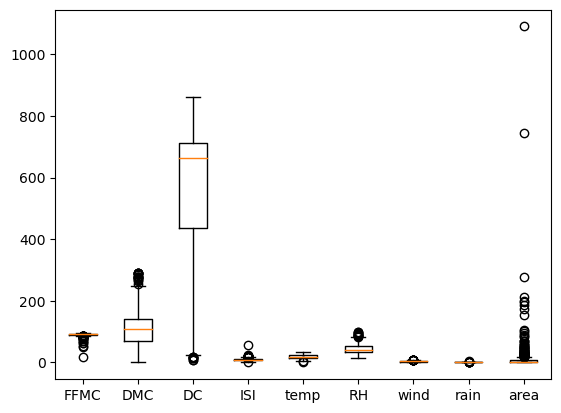

In [ ]:
# outliers = dict(markerfacecolor='red',markersize=12)

plt.boxplot(bp_data, labels= col)
plt.show()